# Lending Club Loan Data Analysis

## Import data and libraries

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [136]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
df = pd.read_csv('loan_data.csv')

In [138]:
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Feature Transformation

In [139]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['purpose'], prefix='purpose', dtype=int)
df_encoded.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


## Exploratory Data Analysis (EDA)

In [140]:
df_encoded.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.243370,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.429139,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


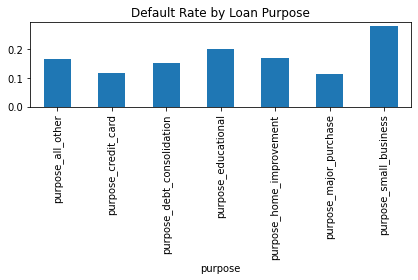

In [141]:
# Default Rate by Loan Purpose (one-hot columns)
purpose_cols = [c for c in df_encoded.columns if c.startswith('purpose_')]
default_rates = {c: df_encoded[df_encoded[c] == 1]['not.fully.paid'].mean() for c in purpose_cols}

rates_df = pd.DataFrame({
    'purpose': list(default_rates.keys()),
    'default_rate': list(default_rates.values())
})

rates_df.plot.bar(x='purpose', y='default_rate', rot=90, figsize=(6,4), legend=False)
plt.title('Default Rate by Loan Purpose')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


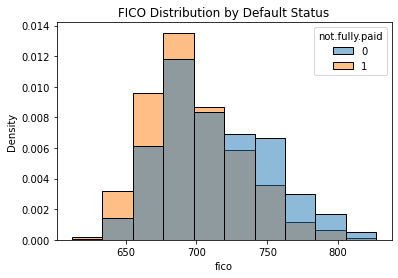

In [142]:
# Histogram of FICO scores for default vs non-default
sns.histplot(data=df_encoded, x='fico', hue='not.fully.paid', bins=10, stat='density', common_norm=False)
plt.title('FICO Distribution by Default Status')
plt.show()

In [143]:
# Define FICO bins and labels in one step
df_encoded['fico_bin'] = pd.cut(df_encoded['fico'], bins=[600, 650, 700, 750, 800, 850],
                                 labels=['600-649','650-699','700-749','750-799','800-849'], include_lowest=True)

# Group by FICO bin
grp = df_encoded.groupby('fico_bin')['not.fully.paid'].agg(total_loans='count', defaults='sum')
grp = grp.reset_index()
grp['default_rate'] = grp['defaults'] / grp['total_loans']

print("\nFICO Tier vs. Default Summary:\n", grp)


FICO Tier vs. Default Summary:
   fico_bin  total_loans  defaults  default_rate
0  600-649          231        74      0.320346
1  650-699         3990       800      0.200501
2  700-749         3687       535      0.145104
3  750-799         1525       114      0.074754
4  800-849          145        10      0.068966


/tmp/ipykernel_59/1194553528.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_encoded.groupby('fico_bin')['not.fully.paid'].agg(total_loans='count', defaults='sum')


In [144]:
# Correlation Check
numeric_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
                'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
                'delinq.2yrs', 'pub.rec']
corr = df_encoded[numeric_cols + ['not.fully.paid']].corr()['not.fully.paid'].drop('not.fully.paid')
print("Correlation with target:\n", corr.sort_values(ascending=False))


Correlation with target:
 int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
Name: not.fully.paid, dtype: float64


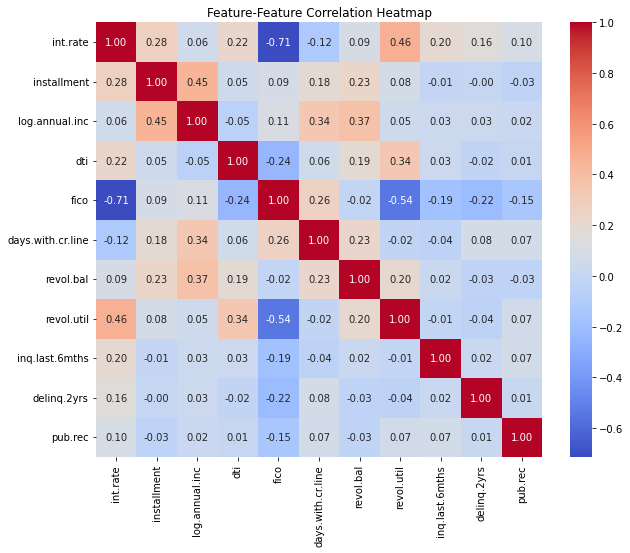

In [145]:
#nter-feature Correlation Heatmap
feature_corr = df_encoded[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(feature_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature-Feature Correlation Heatmap')
plt.show()

In [146]:
# Note: Since no feature pair has [correlation] > 0.8, there is no need to drop any numeric features

In [147]:
X_train = X_train.drop(columns=['fico_bin'], errors='ignore')
X_test = X_test.drop(columns=['fico_bin'], errors='ignore')

## Deep Learning Modeling

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping

In [149]:
X = df_encoded.drop(columns=['not.fully.paid', 'fico_bin'], errors='ignore')
y = df_encoded['not.fully.paid']

In [150]:
# Perform an 80/20 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [151]:
# Sclaing to 0 & 1
continuous_cols = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc','dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()
X_train_scaled[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test_scaled[continuous_cols] = scaler.transform(X_test[continuous_cols])

print(X_train_scaled[continuous_cols].agg(['min','max']).T)

                   min  max
credit.policy      0.0  1.0
int.rate           0.0  1.0
installment        0.0  1.0
log.annual.inc     0.0  1.0
dti                0.0  1.0
fico               0.0  1.0
days.with.cr.line  0.0  1.0
revol.bal          0.0  1.0
revol.util         0.0  1.0
inq.last.6mths     0.0  1.0
delinq.2yrs        0.0  1.0
pub.rec            0.0  1.0


In [152]:
# Handle Class Weights

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

In [153]:
class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)

{0: 0.5952454940957116, 1: 3.124796084828711}


In [154]:
# Complie Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', AUC(name='auc')]
)

In [155]:
# Display model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               2560      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12929 (50.50 KB)
Trainable params: 12929 (50.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [162]:
# Define early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True  # bring back the best model
)

In [163]:
# Train the model
X_train_np = X_train_scaled.to_numpy().astype('float32')
y_train_np = y_train.to_numpy().astype('float32')

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
192/192 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6052 - auc: 0.6819 - val_loss: 0.6111 - val_accuracy: 0.6823 - val_auc: 0.6780
Epoch 2/30
192/192 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.6316 - auc: 0.6878 - val_loss: 0.6296 - val_accuracy: 0.6471 - val_auc: 0.6766
Epoch 3/30
192/192 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.6303 - auc: 0.6893 - val_loss: 0.6992 - val_accuracy: 0.5258 - val_auc: 0.6787
Epoch 4/30
192/192 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.6340 - auc: 0.6943 - val_loss: 0.6821 - val_accuracy: 0.5499 - val_auc: 0.6778
Epoch 5/30
192/192 [==============================] - 0s 1ms/step - loss: 0.6307 - accuracy: 0.6241 - auc: 0.6969 - val_loss: 0.6348 - val_accuracy: 0.6099 - val_auc: 0.6775
Epoch 6/30
192/192 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.6228 - auc: 0.6963 - val_loss: 0.60

In [164]:
# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [170]:
# Get predicted probabilities on train and test
y_train_prob = model.predict(X_train_scaled)
y_test_prob  = model.predict(X_test_scaled)

# Apply a new threshold to get class labels
threshold = 0.40
y_train_pred_thresh = (y_train_prob > threshold).astype(int)
y_test_pred_thresh  = (y_test_prob  > threshold).astype(int)

# Train report
print("Classification Report - Train:")
print(classification_report(y_train, y_train_pred_thresh))

# Test report
print("Classification Report - Test:")
print(classification_report(y_test, y_test_pred_thresh))

60/60 [==============================] - 0s 656us/step
Classification Report - Train:
              precision    recall  f1-score   support

           0       0.95      0.40      0.56      6436
           1       0.22      0.89      0.35      1226

    accuracy                           0.48      7662
   macro avg       0.59      0.64      0.46      7662
weighted avg       0.83      0.48      0.53      7662

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.92      0.37      0.53      1609
           1       0.20      0.84      0.33       307

    accuracy                           0.45      1916
   macro avg       0.56      0.61      0.43      1916
weighted avg       0.81      0.45      0.50      1916



In [172]:
# Predict on train
y_train_pred = (model.predict(X_train_scaled) > 0.4).astype(int)
train_cm = confusion_matrix(y_train, y_train_pred)

# Predict on test
y_test_pred = (model.predict(X_test_scaled) > 0.4).astype(int)
test_cm = confusion_matrix(y_test, y_test_pred)

60/60 [==============================] - 0s 647us/step


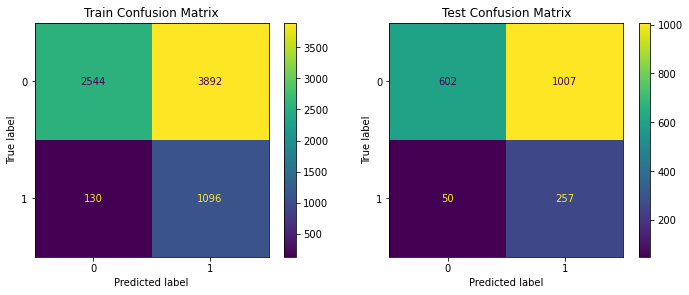

In [174]:
# Plot both confusion matrices
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay(train_cm).plot(ax=ax[0], values_format='d')
ax[0].set_title('Train Confusion Matrix')

ConfusionMatrixDisplay(test_cm).plot(ax=ax[1], values_format='d')
ax[1].set_title('Test Confusion Matrix')

plt.tight_layout()
plt.show()

In [ ]:
# Note: I prioritized recall for the “default” class (not.fully.paid = 1) because missing a true defaulter is more costly than flagging a safe loan.
# Lowered the decision threshold to 0.40 and used class weights so that errors on defaults carried a higher penalty. As a result, the model catches ~85% of actual defaulters (high recall), accepting more false positives to ensure few defaulters go unnoticed.